In [3]:
from datetime import date, timedelta

days=100

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")

In [4]:
import yfinance as yf
import pandas as pd

data = yf.download('BTC-USD',
                      start=start_date,
                      end=end_date,
                      progress=False)
data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-02-13,96623.867188,98111.085938,95269.710938,97888.750000,37147280860
2025-02-14,97508.968750,98819.468750,96342.804688,96623.367188,32697987277
2025-02-15,97580.351562,97975.039062,97240.195312,97508.382812,17047266288
2025-02-16,96175.031250,97725.593750,96060.976562,97580.492188,16536755396
2025-02-17,95773.382812,97032.234375,95243.546875,96179.007812,27336550690
...,...,...,...,...,...
2025-05-19,105606.179688,107068.718750,102112.687500,106430.531250,61761126647
2025-05-20,106791.085938,107307.117188,104206.515625,105605.406250,36515726122


In [5]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data

Price,Close,High,Low,Open,Volume,Date
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,96623.867188,98111.085938,95269.710938,97888.750000,37147280860,2025-02-13
1,97508.968750,98819.468750,96342.804688,96623.367188,32697987277,2025-02-14
2,97580.351562,97975.039062,97240.195312,97508.382812,17047266288,2025-02-15
3,96175.031250,97725.593750,96060.976562,97580.492188,16536755396,2025-02-16
4,95773.382812,97032.234375,95243.546875,96179.007812,27336550690,2025-02-17
...,...,...,...,...,...,...
95,105606.179688,107068.718750,102112.687500,106430.531250,61761126647,2025-05-19
96,106791.085938,107307.117188,104206.515625,105605.406250,36515726122,2025-05-20
97,109678.078125,110724.460938,106127.234375,106791.312500,78086364051,2025-05-21


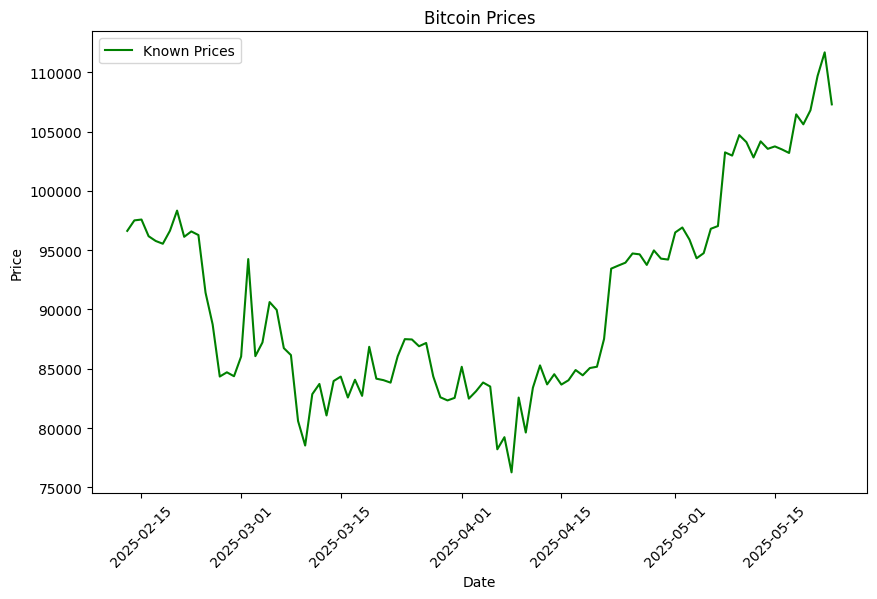

In [6]:
import matplotlib.pyplot as plt

dates = data['Date']

prices = data['Close']

plt.figure(figsize=(10, 6))

plt.plot(dates, prices, color='green', label='Known Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices')

plt.xticks(rotation=45)

plt.legend()

plt.show()

In [7]:
import numpy as np

def create_dataset(serie, window_size=20):
    dataX, dataY = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append([serie[i + window_size, 0]])
    return np.array(dataX), np.array(dataY)

In [8]:
from sklearn.preprocessing import MinMaxScaler

window_size=20

closedf=data[['Close']]
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(closedf)

X, y = create_dataset(closedf, window_size)

In [9]:
X

array([[0.57489126, 0.59989319, 0.60190958, ..., 0.50778881, 0.27664834,
        0.30931727],
       [0.59989319, 0.60190958, 0.56221275, ..., 0.27664834, 0.30931727,
        0.40539748],
       [0.60190958, 0.56221275, 0.55086718, ..., 0.30931727, 0.40539748,
        0.38670226],
       ...,
       [0.50662956, 0.57117583, 0.58297579, ..., 0.76039895, 0.85234245,
        0.82861938],
       [0.57117583, 0.58297579, 0.55421208, ..., 0.85234245, 0.82861938,
        0.86209005],
       [0.58297579, 0.55421208, 0.50969905, ..., 0.82861938, 0.86209005,
        0.94364044]])

In [10]:
y

array([[0.40539748],
       [0.38670226],
       [0.29577192],
       [0.27916017],
       [0.12228598],
       [0.06384074],
       [0.18615849],
       [0.21045556],
       [0.13543983],
       [0.21742541],
       [0.22799021],
       [0.1781779 ],
       [0.2204362 ],
       [0.18209901],
       [0.29892306],
       [0.22302107],
       [0.2195197 ],
       [0.21356632],
       [0.27632923],
       [0.31713389],
       [0.31636525],
       [0.30024099],
       [0.30804348],
       [0.22827379],
       [0.17868349],
       [0.17125262],
       [0.17730863],
       [0.25132443],
       [0.1755233 ],
       [0.19295533],
       [0.21388609],
       [0.20430995],
       [0.05487171],
       [0.08370824],
       [0.        ],
       [0.17801592],
       [0.0947475 ],
       [0.20148631],
       [0.25465588],
       [0.20939959],
       [0.23361941],
       [0.20894807],
       [0.21925488],
       [0.24360094],
       [0.23103234],
       [0.24833704],
       [0.25146942],
       [0.317

In [11]:
len(y)

79

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM

model = Sequential()

model.add(Input(shape=(window_size, 1)))

model.add(LSTM(units=32,  dropout=0.1, activation="relu"))

model.add(Dense(1 , activation="relu"))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=8)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.1871 - mse: 0.1871 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1455 - mse: 0.1455 - val_loss: 0.1910 - val_mse: 0.1910
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0397 - mse: 0.0397 - 

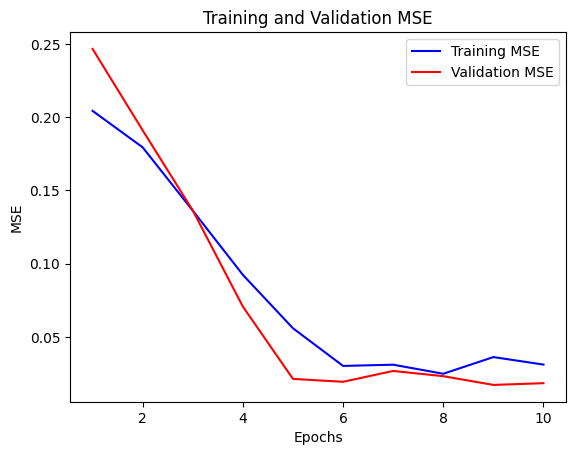

In [15]:
import matplotlib.pyplot as plt

train_mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(train_mse) + 1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [16]:
pred_steps = 10

predicted_prices=[]

X_pred=[X[-1]]

X_pred = np.array(X_pred)

for _ in range(pred_steps):

    prediction = model.predict([X_pred])

    price=prediction[0]

    predicted_prices.append(price)

    X_pred = np.append(X_pred, [price], axis=1)

    X_pred = X_pred[:, 1:]

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 20))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[102678.88326182]
 [102813.32723759]
 [103004.72447948]
 [103192.16531463]
 [103354.79367689]
 [103458.35657936]
 [103543.98377134]
 [103498.26248017]
 [103449.45413671]
 [103362.38786772]]


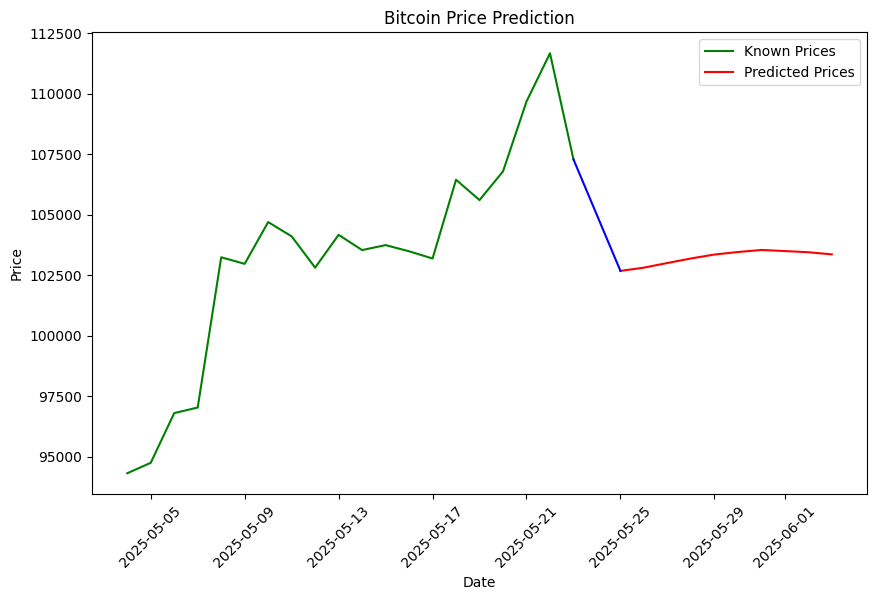

In [17]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predicted_prices, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predicted_prices[0]], color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=45)

plt.legend()

plt.show()